In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Dicoding/Belajar Penerapan Data Science/Tugas 1_Menyelesaikan Permasalahan Human Resources/employee_data.csv", sep=",")
df.head(100)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,29,NaN,Travel_Rarely,136,Research & Development,1,3,Life Sciences,1,...,1,80,1,6,5,2,5,3,0,2
96,97,57,0.0,Travel_Rarely,405,Research & Development,1,2,Life Sciences,1,...,1,80,1,13,2,2,12,9,2,8
97,98,53,NaN,Travel_Rarely,1168,Sales,24,4,Life Sciences,1,...,2,80,0,15,2,2,2,2,2,2
98,99,33,0.0,Travel_Rarely,147,Research & Development,4,4,Medical,1,...,4,80,0,7,3,3,3,2,1,1


In [3]:
import numpy as np

print("Jumlah data yang hilang sebelum dibersihkan:")
print(df.isnull().sum())

# Hapus baris di mana 'Attrition' (target kita) kosong
df.dropna(subset=['Attrition'], inplace=True)

# Isi nilai numerik yang kosong dengan nilai median (tengah)
for col in ['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

# Isi nilai kategorikal yang kosong dengan nilai yang paling sering muncul (modus)
for col in ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

# Ubah tipe data 'Attrition' menjadi angka untuk perhitungan
df['Attrition'] = df['Attrition'].astype(int)

print("\nJumlah data yang hilang setelah dibersihkan:", df.isnull().sum().sum())

# Hitung dan tampilkan tingkat attrition keseluruhan
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print("\nTingkat Attrition Keseluruhan:")
print(attrition_rate)

# Simpan data yang sudah bersih ke file baru untuk digunakan nanti
df.to_csv('employee_data_cleaned.csv', index=False)
print("\nData bersih disimpan sebagai 'employee_data_cleaned.csv'")

Jumlah data yang hilang sebelum dibersihkan:
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear      

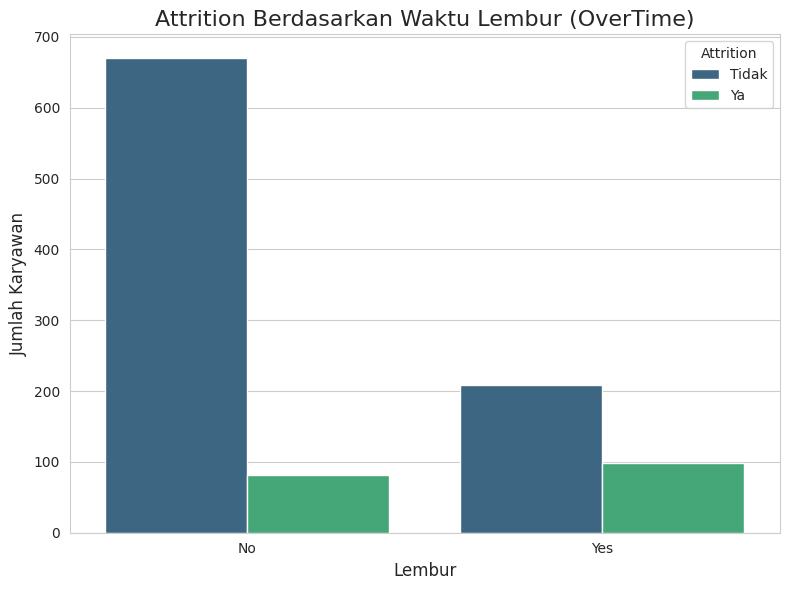

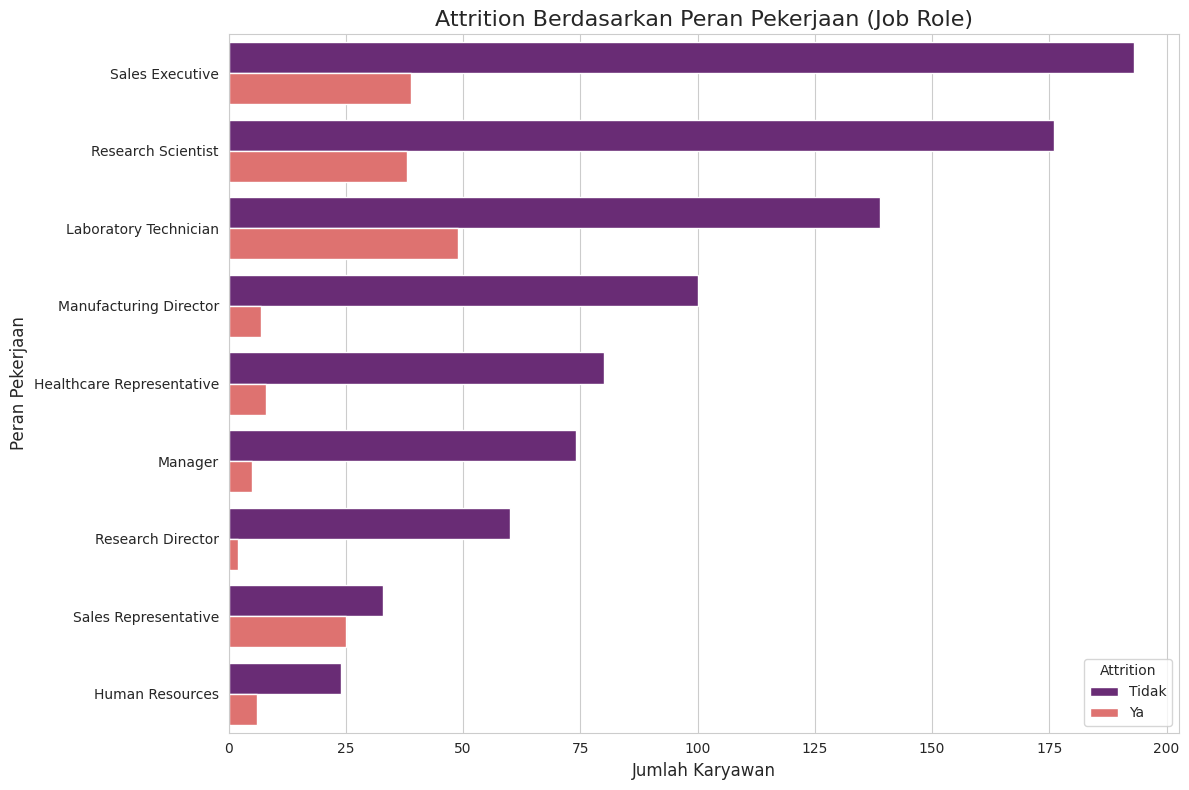

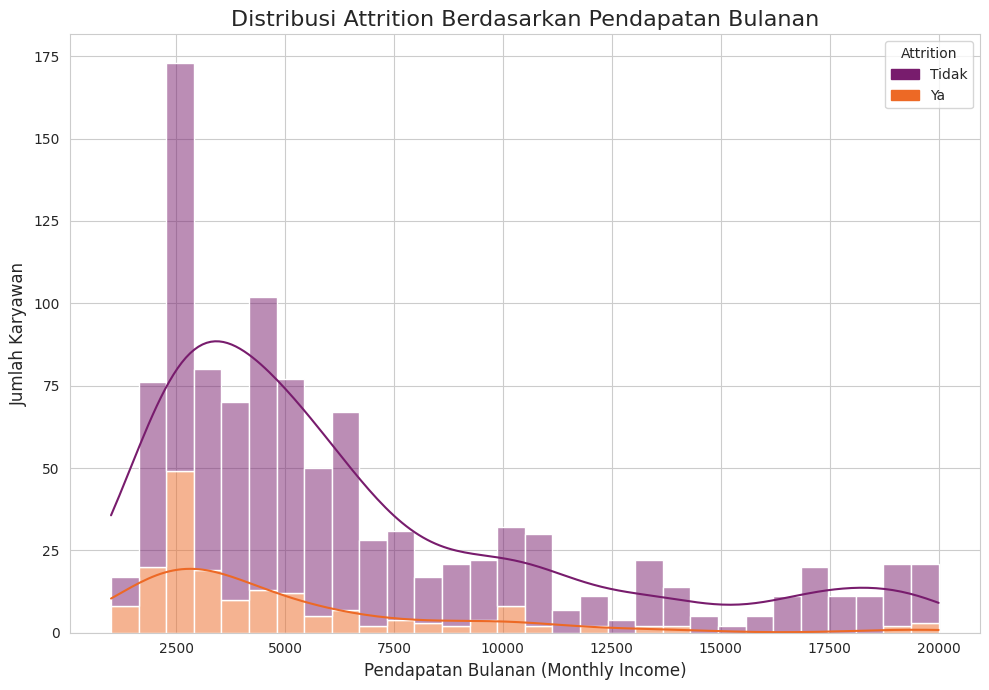

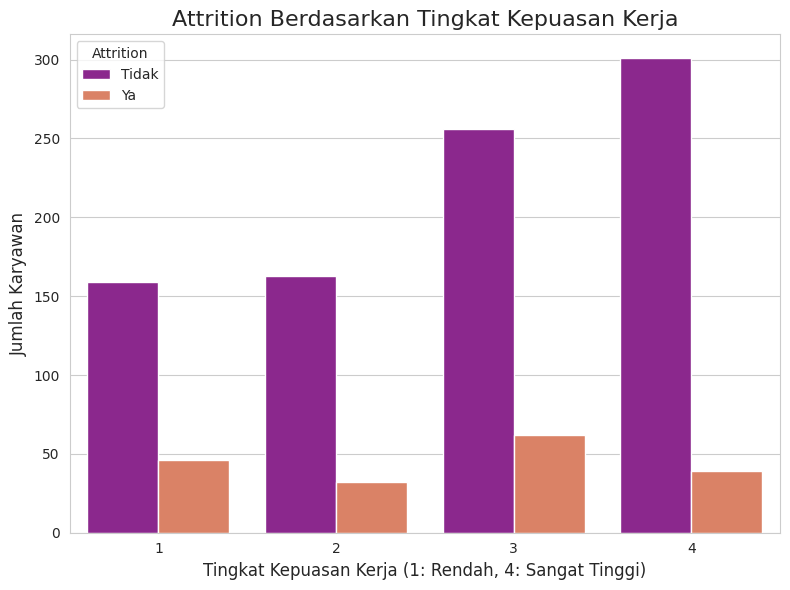

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur gaya visualisasi
sns.set_style("whitegrid")

# Muat data yang sudah bersih
df_cleaned = pd.read_csv('employee_data_cleaned.csv')

# 1. Attrition Berdasarkan Waktu Lembur (OverTime)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='OverTime', hue='Attrition', palette='viridis')
plt.title('Attrition Berdasarkan Waktu Lembur (OverTime)', fontsize=16)
plt.xlabel('Lembur', fontsize=12)
plt.ylabel('Jumlah Karyawan', fontsize=12)
plt.legend(title='Attrition', labels=['Tidak', 'Ya'])
plt.tight_layout()
plt.savefig('attrition_by_overtime.png')
plt.show()

# 2. Attrition Berdasarkan Peran Pekerjaan (Job Role)
plt.figure(figsize=(12, 8))
sns.countplot(data=df_cleaned, y='JobRole', hue='Attrition', order=df_cleaned['JobRole'].value_counts().index, palette='magma')
plt.title('Attrition Berdasarkan Peran Pekerjaan (Job Role)', fontsize=16)
plt.xlabel('Jumlah Karyawan', fontsize=12)
plt.ylabel('Peran Pekerjaan', fontsize=12)
plt.legend(title='Attrition', labels=['Tidak', 'Ya'])
plt.tight_layout()
plt.savefig('attrition_by_jobrole.png')
plt.show()

# 3. Distribusi Attrition Berdasarkan Pendapatan Bulanan
plt.figure(figsize=(10, 7))
sns.histplot(data=df_cleaned, x='MonthlyIncome', hue='Attrition', multiple='stack', kde=True, bins=30, palette='inferno')
plt.title('Distribusi Attrition Berdasarkan Pendapatan Bulanan', fontsize=16)
plt.xlabel('Pendapatan Bulanan (Monthly Income)', fontsize=12)
plt.ylabel('Jumlah Karyawan', fontsize=12)
# Manual legend creation because histplot hue can be tricky
handles = [plt.Rectangle((0,0),1,1, color=sns.color_palette('inferno', 2)[i]) for i in range(2)]
plt.legend(handles, ['Tidak', 'Ya'], title='Attrition')
plt.tight_layout()
plt.savefig('attrition_by_income.png')
plt.show()

# 4. Attrition Berdasarkan Tingkat Kepuasan Kerja
plt.figure(figsize=(8, 6))
satisfaction_order = [1, 2, 3, 4] # 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
sns.countplot(data=df_cleaned, x='JobSatisfaction', hue='Attrition', order=satisfaction_order, palette='plasma')
plt.title('Attrition Berdasarkan Tingkat Kepuasan Kerja', fontsize=16)
plt.xlabel('Tingkat Kepuasan Kerja (1: Rendah, 4: Sangat Tinggi)', fontsize=12)
plt.ylabel('Jumlah Karyawan', fontsize=12)
plt.legend(title='Attrition', labels=['Tidak', 'Ya'])
plt.tight_layout()
plt.savefig('attrition_by_satisfaction.png')
plt.show()

Akurasi Model: 0.8443396226415094

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       176
           1       0.80      0.11      0.20        36

    accuracy                           0.84       212
   macro avg       0.82      0.55      0.55       212
weighted avg       0.84      0.84      0.79       212



/tmp/ipython-input-1441924232.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='rocket')



Grafik faktor terpenting disimpan sebagai 'feature_importance.png'


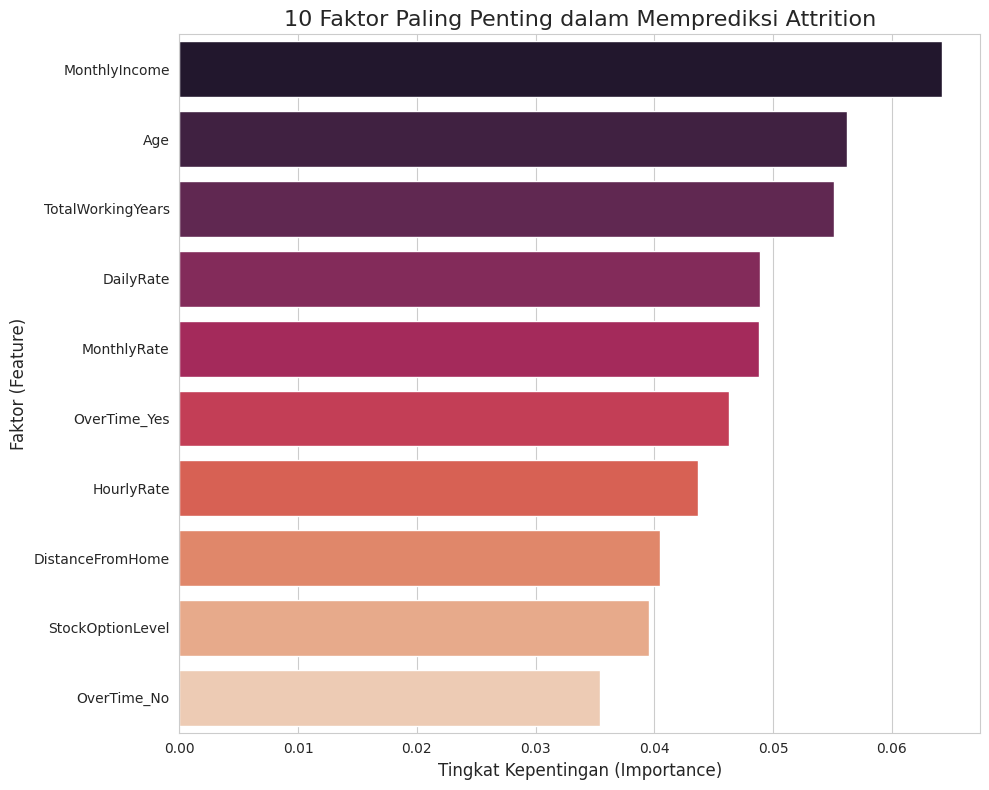

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Muat data bersih
df_model = pd.read_csv('employee_data_cleaned.csv')

# --- Persiapan untuk Model ---
# Hapus kolom yang tidak relevan untuk prediksi
df_model = df_model.drop(['EmployeeId', 'StandardHours', 'EmployeeCount', 'Over18'], axis=1)

# Pisahkan fitur (X) dan target (y)
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

# Identifikasi kolom numerik dan kategorikal
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# Buat alur pra-pemrosesan data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# --- Pelatihan Model ---
# Buat alur model lengkap dengan pra-pemrosesan dan klasifikasi
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=42, n_estimators=150, class_weight='balanced'))])

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Latih model
model.fit(X_train, y_train)

# --- Evaluasi Model ---
# Buat prediksi
y_pred = model.predict(X_test)

# Cetak hasil evaluasi
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# --- Analisis Faktor Penting ---
# Ekstrak nama fitur setelah di-encode
ohe_feature_names = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, ohe_feature_names])

# Dapatkan tingkat kepentingan fitur dari model
importances = model.named_steps['classifier'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10) # Ambil 10 teratas

# Tampilkan grafik faktor terpenting
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='rocket')
plt.title('10 Faktor Paling Penting dalam Memprediksi Attrition', fontsize=16)
plt.xlabel('Tingkat Kepentingan (Importance)', fontsize=12)
plt.ylabel('Faktor (Feature)', fontsize=12)
plt.tight_layout()
plt.savefig('feature_importance.png')
print("\nGrafik faktor terpenting disimpan sebagai 'feature_importance.png'")
plt.show()